# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
# Configure display options for better viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Load the Dataset

In [3]:
# Define the path to your raw data
file_path = '../data/raw/training.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure 'training.csv' is in the 'data/raw/' directory.")
    df = None # Set df to None to prevent errors in subsequent cells

Dataset loaded successfully.
Number of rows: 95662
Number of columns: 16


## Overview Dataset

In [5]:
if df is not None:
    print("\nFirst 5 rows of the dataset:")
    display(df.head())

if df is not None:
    print("\nDataset Information:")
    df.info()


First 5 rows of the dataset:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 1

## Summary Statistics

* Numerical Features Summary

In [6]:
if df is not None:
    print("\nSummary Statistics for Numerical Features:")
    display(df.describe())


Summary Statistics for Numerical Features:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


* Unique Value and Frequencies

In [ ]:
if df is not None:
    print("\nSummary Statistics for Categorical Features:")
    for column in df.select_dtypes(include='object').columns:
        print(f"\n--- Column: {column} ---")
        print(df[column].value_counts(normalize=True).head(10)) # Top 10 most frequent categories
        print(f"Number of unique values: {df[column].nunique()}")




Summary Statistics for Categorical Features:

--- Column: TransactionId ---
TransactionId
TransactionId_35670     0.00001
TransactionId_76871     0.00001
TransactionId_73770     0.00001
TransactionId_26203     0.00001
TransactionId_380       0.00001
TransactionId_28195     0.00001
TransactionId_23223     0.00001
TransactionId_118063    0.00001
TransactionId_100640    0.00001
TransactionId_51905     0.00001
Name: proportion, dtype: float64
Number of unique values: 95662

--- Column: BatchId ---
BatchId
BatchId_67019     0.000293
BatchId_51870     0.000167
BatchId_113893    0.000146
BatchId_127204    0.000125
BatchId_116835    0.000105
BatchId_88001     0.000094
BatchId_49408     0.000073
BatchId_110084    0.000073
BatchId_34879     0.000063
BatchId_86880     0.000063
Name: proportion, dtype: float64
Number of unique values: 94809

--- Column: AccountId ---
AccountId
AccountId_4841    0.322939
AccountId_4249    0.046591
AccountId_4840    0.018168
AccountId_3206    0.011551
AccountId_318

## Distribution of Numerical Features

* Histograms of Numerical Features 


Histograms for Numerical Features:


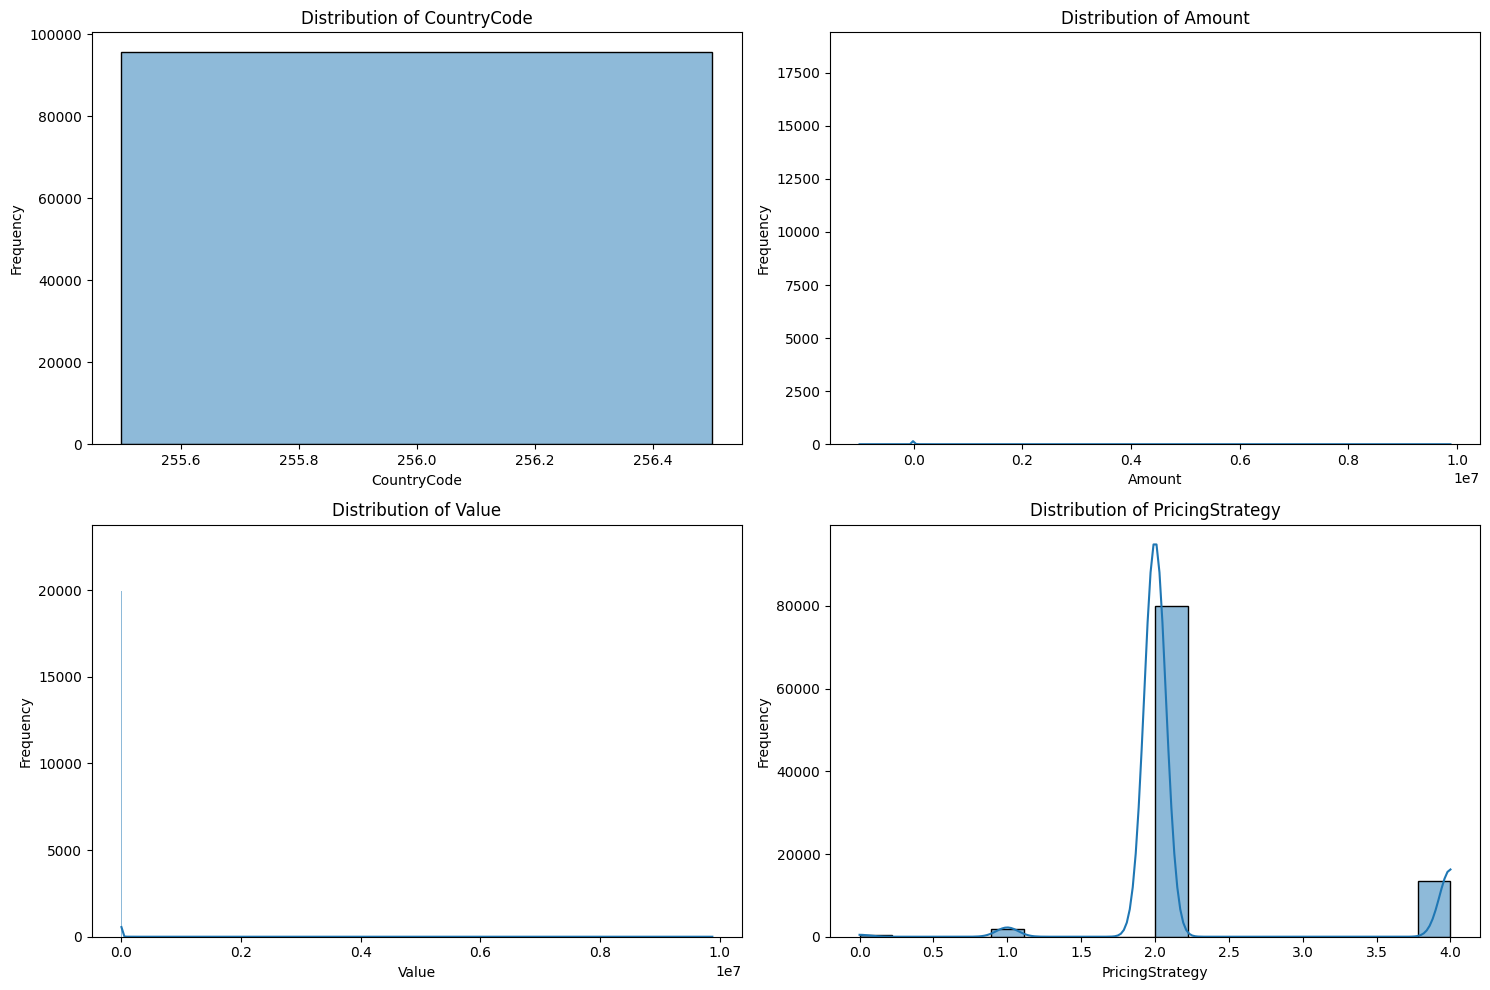


Checking consistency between 'Amount' and 'Value':
Number of rows where Value is not the absolute of Amount: 2565


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.00,21800,2018-11-15T03:32:55Z,2,0
34,TransactionId_10285,BatchId_113188,AccountId_4841,SubscriptionId_3829,CustomerId_2531,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-67.25,68,2018-11-15T05:50:48Z,2,0
41,TransactionId_34855,BatchId_45933,AccountId_826,SubscriptionId_1611,CustomerId_1170,UGX,256,ProviderId_5,ProductId_21,utility_bill,ChannelId_3,10000.00,11200,2018-11-15T06:03:00Z,2,0
48,TransactionId_86046,BatchId_112945,AccountId_714,SubscriptionId_2767,CustomerId_1057,UGX,256,ProviderId_5,ProductId_21,utility_bill,ChannelId_3,5000.00,5750,2018-11-15T06:08:57Z,2,0
67,TransactionId_26794,BatchId_27897,AccountId_2132,SubscriptionId_4234,CustomerId_2537,UGX,256,ProviderId_6,ProductId_21,utility_bill,ChannelId_3,5000.00,5750,2018-11-15T06:39:10Z,2,0


In [8]:
if df is not None:
    print("\nHistograms for Numerical Features:")
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    # Exclude IDs and FraudResult for general distribution, as their 'distribution' is not typical
    # We will analyze FraudResult separately
    cols_to_plot = [col for col in numerical_cols if col not in ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'FraudResult']]

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(cols_to_plot):
        plt.subplot(2, 2, i + 1) # Adjust subplot grid based on number of numerical features
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Special check for Amount vs Value consistency
    print("\nChecking consistency between 'Amount' and 'Value':")
    # Count rows where Value is not the absolute value of Amount
    inconsistent_amount_value = df[df['Value'] != df['Amount'].abs()].shape[0]
    print(f"Number of rows where Value is not the absolute of Amount: {inconsistent_amount_value}")
    if inconsistent_amount_value > 0:
        display(df[df['Value'] != df['Amount'].abs()].head())

## Distribution of Categorical Features
* Bar Plots for Top Categorical features.


Bar Plots for Top Categorical Features:


C:\Users\hp\AppData\Local\Temp\ipykernel_7748\1761525522.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette='viridis') # Top 10 categories
C:\Users\hp\AppData\Local\Temp\ipykernel_7748\1761525522.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette='viridis') # Top 10 categories
C:\Users\hp\AppData\Local\Temp\ipykernel_7748\1761525522.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ord

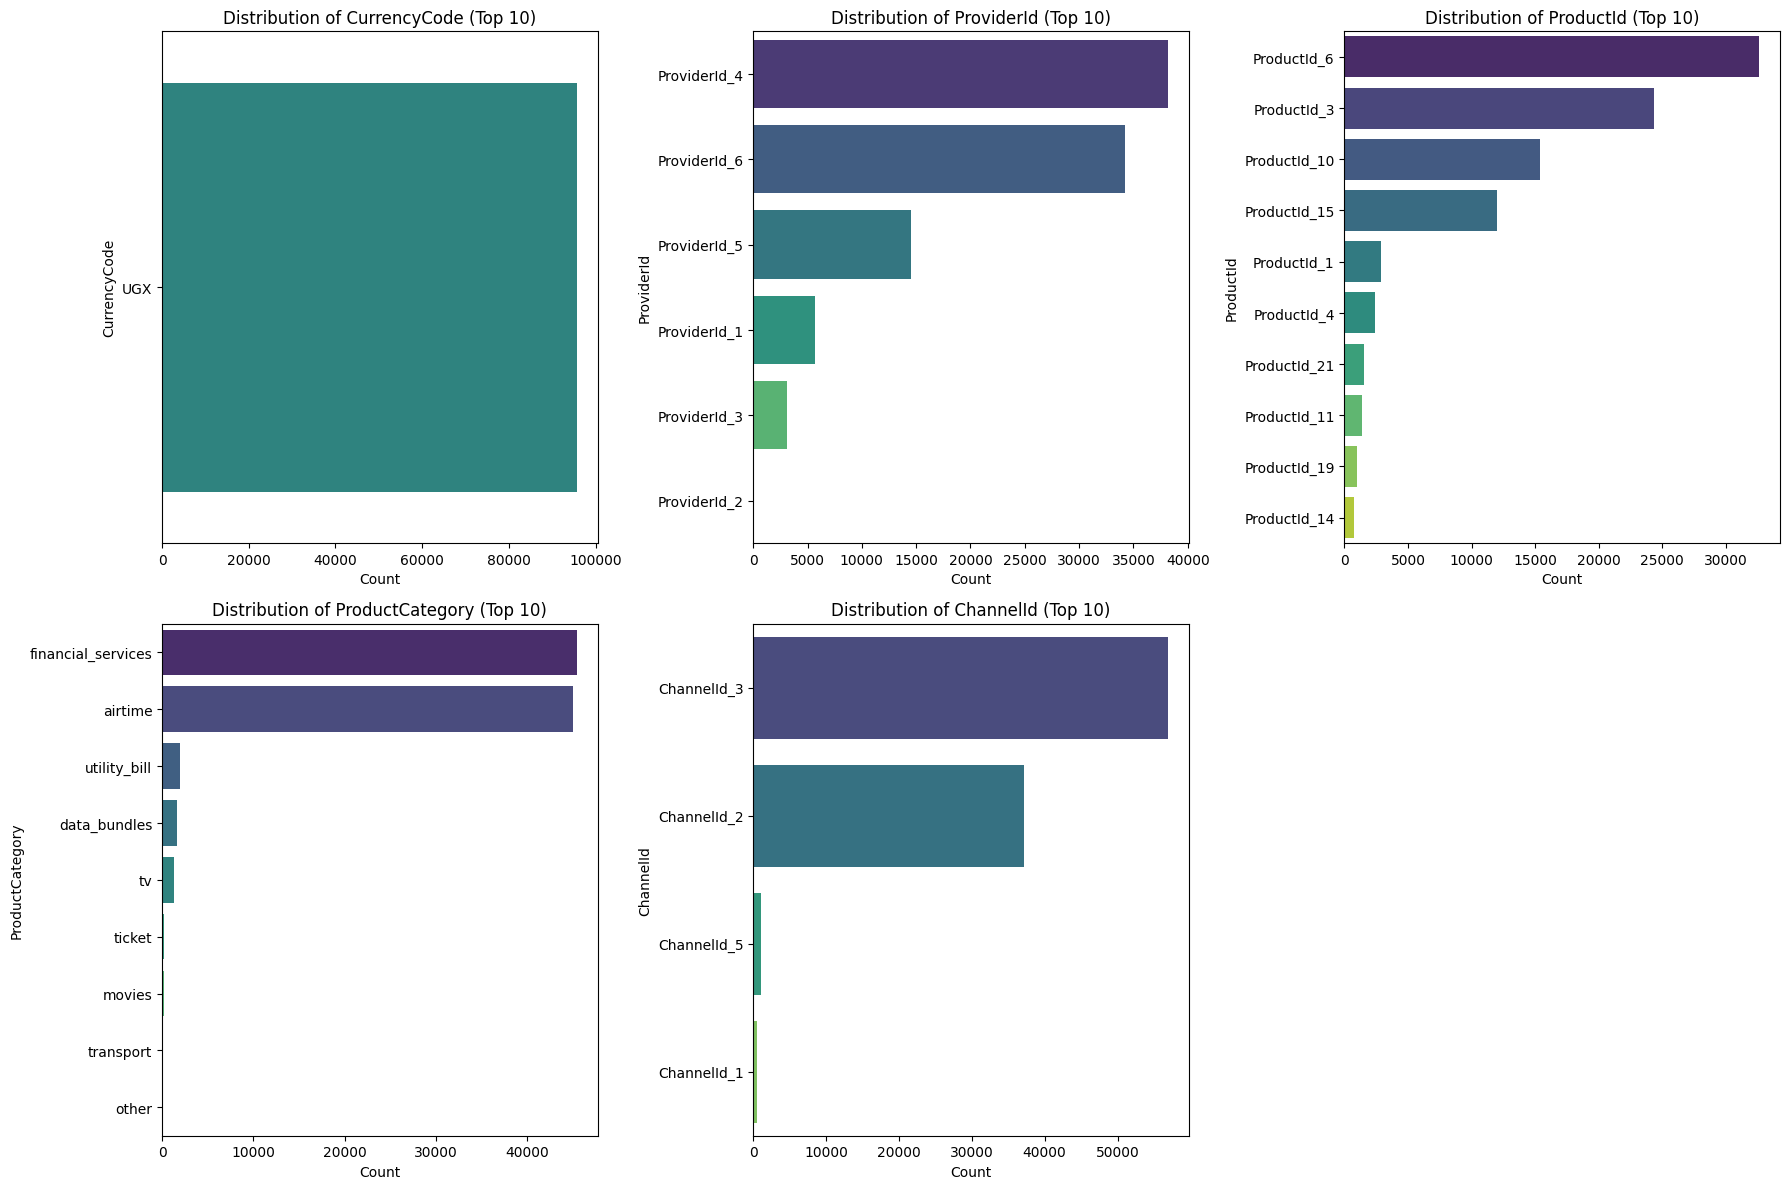

In [9]:
if df is not None:
    print("\nBar Plots for Top Categorical Features:")
    categorical_cols = df.select_dtypes(include='object').columns.tolist()

    plt.figure(figsize=(18, 12))
    # Consider only columns with a reasonable number of unique values for plotting
    # Exclude ID-like columns and 'TransactionStartTime' for direct bar plots
    cols_to_plot = [col for col in categorical_cols if col not in ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'TransactionStartTime'] and df[col].nunique() < 50]

    for i, col in enumerate(cols_to_plot):
        plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
        sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette='viridis') # Top 10 categories
        plt.title(f'Distribution of {col} (Top 10)')
        plt.xlabel('Count')
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()